# Lighthouse problem

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

![Scheme](lighthouse.png)

Let us look at the following problem (extracted from D. Sivia's book, "Data Analysis - A Bayesian Tutorial"):

> A lighthouse is somewhere off a piece of straight coastline at a position $\alpha$ along the shore and a distance $\beta$ out at sea. It emits a series of short highly collimated flashes at random intervals and hence at random azimuths. These pulses are intercepted on the coast by photo-detectors that record only the fact that a flash has occurred, but not the angle from which it came. $N$ flashes have been recorded so far at positions $\{x_k\}$. Where is the lighthouse?

For simplicity, we will assume $\beta$ is known, so that the only parameter we need to estimate is $\alpha$. Let us start by writing the likelihood for this problem; since the flashes are thrown at random azimuths, we know that

$$P(\theta_k | \alpha, \beta) = \frac{1}{\pi}$$

Moreover

$$\beta \tanh(\theta_k) = x_k - \alpha$$

and by changing variables we get

$$P(x_k | \alpha, \beta) = \frac{\beta}{\pi \big[ \beta^2 + (x_k - \alpha)^2 \big]}$$

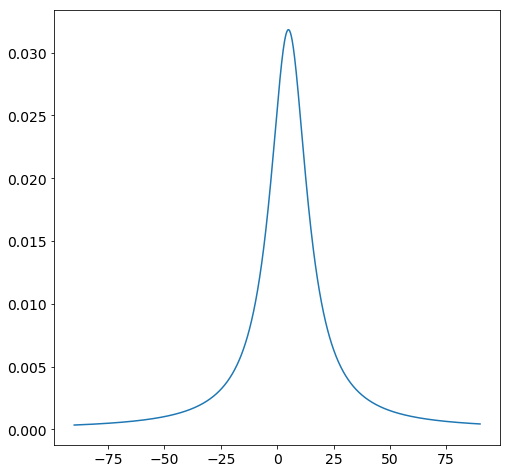

In [22]:
# Let us compute and plot the likelihood
def likelihood(x, alpha, beta):
    return beta / (np.pi * (beta ** 2 + (x - alpha) ** 2))

# Parameters
alpha = 5.0
beta = 10.0

x = np.linspace(-90, 90, 1001)
plt.plot(x, likelihood(x, alpha, beta))

The likelihood is known as a Cauchy or Lorentz distribution. Let us sample from it so that we can have some synthetic data to work with.

In [23]:
# Now we generate some synthetic data
alpha = 30.0
beta = 10.0

from scipy.stats import cauchy
samples = cauchy.rvs(loc = alpha, scale = beta, size = 1000)

In order to write the posterior we use Bayes theorem

$$P(\alpha | \{x_k\}, \beta) \propto \prod_{k = 1}^N P(\{x_k\} | \alpha, \beta)$$

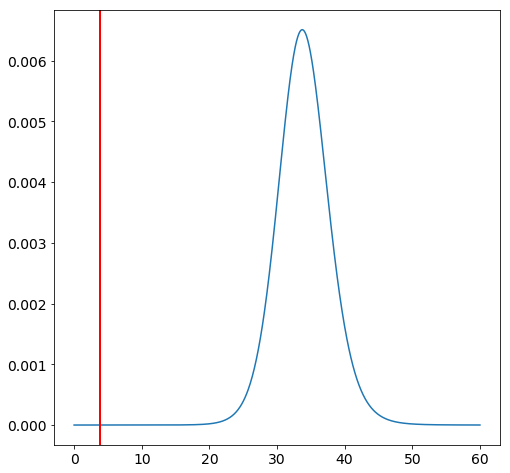

In [24]:
# Computes the (unnormalized) posterior for a given set of samples
def posterior(x, alpha, beta):
    post = np.ones(len(alpha))
    for x_k in x:
        post *= likelihood(x_k, alpha, beta)
        post /= np.sum(post)
    return post

def plot_posterior(n_samples):
    alphas = np.linspace(0, 60, 1001)
    plt.plot(alphas, posterior(samples[:n_samples], alphas, beta))
    plt.axvline(np.mean(samples[:n_samples]), c = "r", lw = 2)
    
plot_posterior(10)

**Exercise**: do a set w/ 4 subplots for different values of $N = 2, 5, 20, 100$.

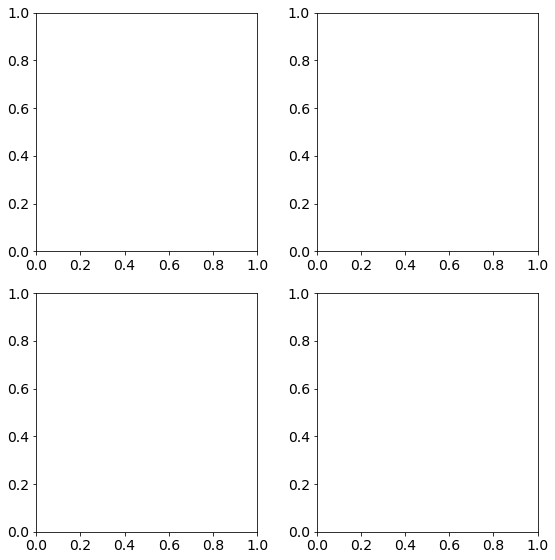

In [25]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout()

alphas = np.linspace(0, 60, 1001)

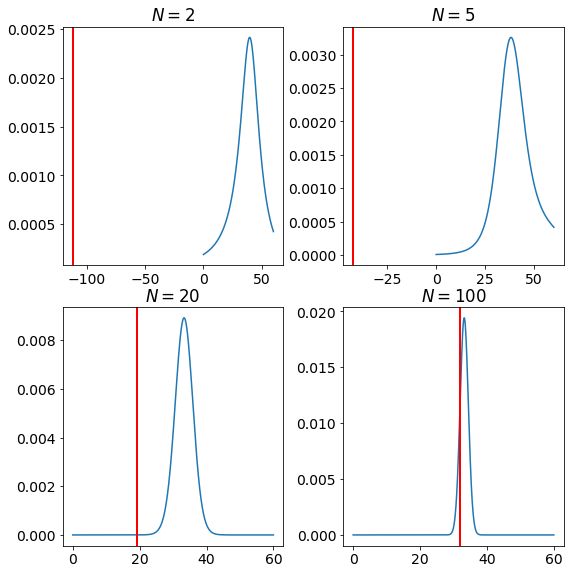

In [26]:
# %load lighthouse1.py
fig, axs = plt.subplots(2, 2)
fig.tight_layout()

alphas = np.linspace(0, 60, 1001)

axs[0,0].plot(alphas, posterior(samples[:2], alphas, beta))
axs[0,0].axvline(np.mean(samples[:2]), c = "r", lw = 2)
axs[0,0].set_title(r"$N = 2$")
axs[0,1].plot(alphas, posterior(samples[:5], alphas, beta))
axs[0,1].axvline(np.mean(samples[:5]), c = "r", lw = 2)
axs[0,1].set_title(r"$N = 5$")
axs[1,0].plot(alphas, posterior(samples[:20], alphas, beta))
axs[1,0].axvline(np.mean(samples[:20]), c = "r", lw = 2)
axs[1,0].set_title(r"$N = 20$")
axs[1,1].plot(alphas, posterior(samples[:100], alphas, beta))
axs[1,1].axvline(np.mean(samples[:100]), c = "r", lw = 2)
axs[1,1].set_title(r"$N = 100$")

Note the mean does not coincide with the mode of the posterior! Why is that? Will they coincide in the $N \to \infty$ limit?

Finally, let us compute the value of $\alpha$ that actually maximizes the posterior (and the likelihood, since our prior here is uniform). The log-likelihood reads

$$\mathcal{L} (\alpha) = \sum_k \log P(x_k | \alpha, \beta) = -\sum_k \log[\beta^2 + (x_k - \alpha)^2)] + {\rm cst.}$$

so that the maximum is obtained at

$$2 \sum_k \frac{x_k - \alpha^\ast}{\beta^2 + (x_k - \alpha^\ast)^2} = 0$$

Let us try to solve this numerically for different values of $N$.

**Exercise**: plot the ML estimate of $\alpha$ for $N$ between 10 and 1000.

In [27]:
from scipy.optimize import brentq

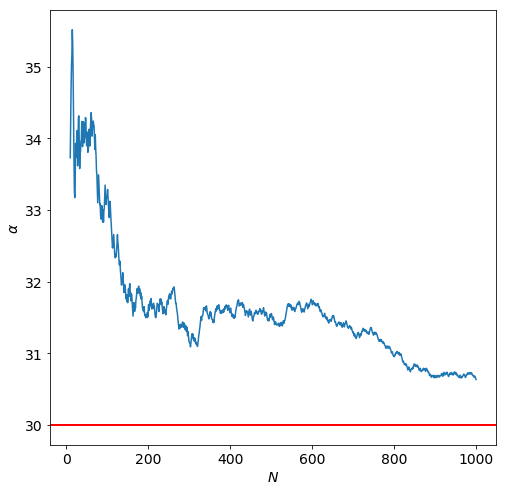

In [29]:
# %load lighthouse2.py
from scipy.optimize import brentq

def f(alpha, x):
    return 2 * np.sum((x - alpha) / (beta ** 2 + (x - alpha) ** 2))

ns = range(10,1000)
alphas = [brentq(f, -90, 90, args = samples[:n_samples]) for n_samples in ns]
plt.plot(ns, alphas)
plt.axhline(30, color = "r", lw = 2)
plt.xlabel(r"$N$")
plt.ylabel(r"$\alpha$")